In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
def check_views_frame_consistency(root_dir):
    """
    Check if all views in each sequence have the same number of frames.
    
    Parameters:
    - root_dir: The root directory containing sequences and views.
    """
    
    # Loop through each sequence in the root directory.
    for seq in os.listdir(root_dir):
        seq_path = os.path.join(root_dir, seq)

        # Check if the current path is a directory (i.e., it is a sequence folder).
        if os.path.isdir(seq_path):
            view_frame_counts = []  # To store the frame count for each view

            # Loop through each view folder inside the sequence directory.
            for view in os.listdir(seq_path):
                view_path = os.path.join(seq_path, view)

                # Check if the current path is a directory (i.e., it is a view folder).
                if os.path.isdir(view_path):

                    # Get all files that end with .jpg (frame files).
                    frames = [
                        f for f in os.listdir(view_path)
                        if f.endswith('.jpg')
                    ]

                    # Add the frame count for this view to the list.
                    view_frame_counts.append(len(frames))

            # Check if all views have the same frame count.
            if len(set(view_frame_counts)) == 1:
                print(f"All views in sequence {seq} have the same number of frames.")
            else:
                print(f"Inconsistent frame counts in sequence {seq}. Frame counts: {view_frame_counts}")


# In raw data, check if all views of each sequence has same number of frames
raw_data_path = os.path.join('..','data', 'raw')
check_views_frame_consistency(raw_data_path)

All views in sequence seq_1 have the same number of frames.
All views in sequence seq_10 have the same number of frames.
All views in sequence seq_11 have the same number of frames.
All views in sequence seq_12 have the same number of frames.
All views in sequence seq_2 have the same number of frames.
All views in sequence seq_3 have the same number of frames.
All views in sequence seq_4 have the same number of frames.
All views in sequence seq_5 have the same number of frames.
All views in sequence seq_6 have the same number of frames.
All views in sequence seq_7 have the same number of frames.
All views in sequence seq_8 have the same number of frames.
All views in sequence seq_9 have the same number of frames.


Total number of sequences in the processed dataset is:  306


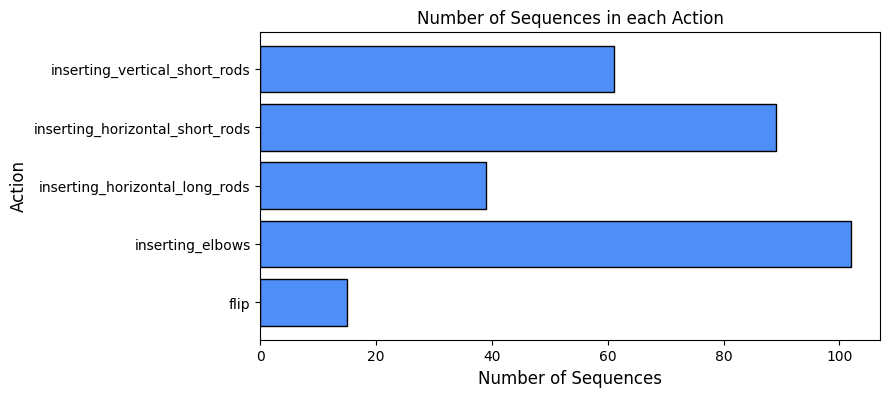

In [3]:
def count_sequences_by_action(root_dir):
    '''
    Calculate the number of sequences for each action in the dataset.
    
    Parameters:
    - root_dir: The root directory containing sequences and views.

    Returns:
    - actions: A list of action names (directory names).
    - counts: A list of sequence counts corresponding to each action.
    '''
    action_counts = {}
    total_sequences = 0

    # Loop through each action directory in the root directory.
    for action in os.listdir(root_dir):
        action_path = os.path.join(root_dir, action)

        # Check if the current action path is a directory.
        if os.path.isdir(action_path):
            seq_count = 0  # Initialize the sequence count for the current action

            # Loop through each sequence folder inside the action directory.
            for seq in os.listdir(action_path):
                seq_path = os.path.join(action_path, seq)

                # Count the sequence if it's a directory and its name starts with 'seq_'.
                if os.path.isdir(seq_path) and seq.startswith('seq_'):
                    seq_count += 1  # Increment the sequence count once per sequence

            # Store the sequence count for the current action.
            action_counts[action] = seq_count
            total_sequences += seq_count  # Update the total sequence count

    # Get the list of actions and their corresponding sequence counts.
    actions = list(action_counts.keys())
    counts = list(action_counts.values())

    return actions, counts


# In processed data, plot a bar chart of total number of sequences for each action
processed_data_path = os.path.join('..','data', 'processed')
actions, counts = count_sequences_by_action(processed_data_path)

# Print the total number of sequences
print('Total number of sequences in the processed dataset is: ', sum(counts))

# Plot the bar chart
plt.figure(figsize=(8, 4))
plt.barh(actions, counts, color='#4f8ef7', edgecolor='black')
plt.title('Number of Sequences in each Action', fontsize=12)
plt.ylabel('Action', fontsize=12)
plt.xlabel('Number of Sequences', fontsize=12)
plt.show()

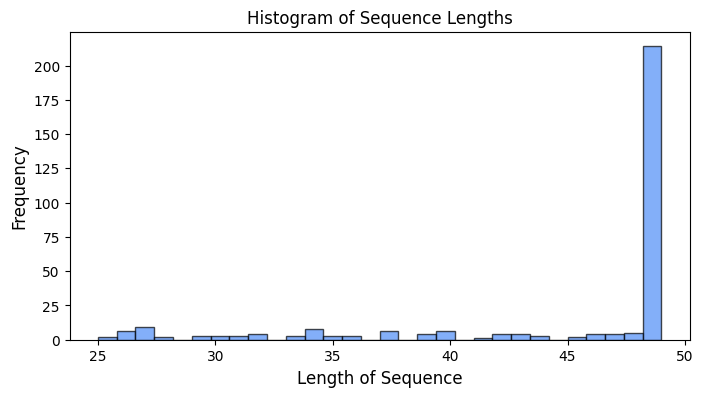

In [4]:
def compute_seq_lengths(root_dir):
    '''
    Compute the lengths of sequences
    
    Parameters:
    - root_dir: The root directory containing action subdirectories, where each action contains 
      sequence subdirectories, and each sequence may have multiple views.

    Returns:
    - seq_lengths: A list of integers, where each entry represents the number of frames in a sequence 
    '''
    seq_lengths = []
    min_length = float('inf')
    min_seq_path = None

    # Loop through each action directory in the root directory.
    for action in os.listdir(root_dir):
        act_dir = os.path.join(root_dir, action)

        # Check if the current path is a directory.
        if os.path.isdir(act_dir):

            # Loop through each sequence folder inside the action directory.
            for seq in os.listdir(act_dir):
                seq_dir = os.path.join(act_dir, seq)

                # Check if it's a directory and its name starts with 'seq_'.
                if os.path.isdir(seq_dir) and seq.startswith('seq_'):

                    # Only count frames from the first view it encounters.
                    for view in os.listdir(seq_dir):
                        view_dir = os.path.join(seq_dir, view)

                        # Check if it's a directory and its name starts with 'view_'.
                        if os.path.isdir(view_dir) and view.startswith('view_'):
                            # Collect the frame filenames from the view directory.
                            frame_files = [
                                name for name in os.listdir(view_dir)
                                if name.endswith('.jpg')
                            ]

                            # Append the number of frames for this sequence (using the first view).
                            seq_lengths.append(len(frame_files))

                            # Stop after counting frames from the first view.
                            break

    return seq_lengths

# In processed data, plot a histogram of lengths of sequences to see the length distribution
seq_lengths = compute_seq_lengths(processed_data_path)

# Plot the histogram
plt.figure(figsize=(8, 4))
plt.hist(seq_lengths, bins=30, color='#4f8ef7', edgecolor='black', alpha=0.7)
plt.title('Histogram of Sequence Lengths', fontsize=12)
plt.xlabel('Length of Sequence', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()
